In [139]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix

raiting = pd.read_csv('./ratings_drop.csv' , usecols=[ 'userId' , 'productId' , 'rating'] )
products = pd.read_csv('./products_join_categories.csv')
products = products.loc[:, ~products.columns.str.contains('^Unnamed')]
products.set_index( ['productId'] , inplace=True, drop=True )
products = products.rename({'name': 'product_name'}, axis='columns')
display(products.head())

,product_name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name
productId,,,,,,,,
0,CSSMs Biology: Control in Cells and in Organis...,"832,476,923",832,图书音像,476,其它图书,923.0,进口图书
1,Treasure Island,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿
2,Collins Primary Dictionaries – Collins Junior ...,"832,476,739",832,图书音像,476,其它图书,739.0,工具书
3,Partners in Crime,"832,476,923",832,图书音像,476,其它图书,923.0,进口图书
4,The Hobbit,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿


In [140]:
raiting.sample(10)

,userId,productId,rating
5945793,704170.0,136249,5.0
5865174,135.0,129857,5.0
5101968,135121.0,355070,5.0
7062689,114231.0,485497,5.0
3584480,6062.0,510878,5.0
3302495,88602.0,205893,2.0
6972145,247267.0,358266,5.0
5146196,8244.0,518716,3.0
1060704,30201.0,425967,5.0
4671200,592977.0,243622,4.0


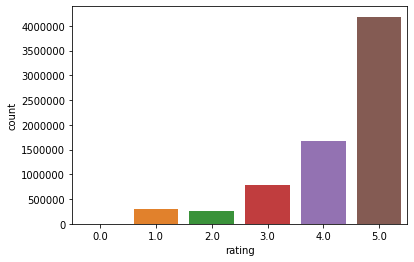

In [141]:
sns.countplot(data=raiting , x = 'rating' )
plt.show()

In [142]:
userRaitingCount = raiting['userId'].value_counts();
raitingFiltered = raiting[raiting['userId'].isin(userRaitingCount[userRaitingCount >= 50 ].index)]
print(raitingFiltered.shape)
print(raiting.shape)
productRaitingCount = raiting['productId'].value_counts();
raitingFiltered = raitingFiltered[raitingFiltered['userId'].isin(productRaitingCount[productRaitingCount >= 100 ].index)]
print(raitingFiltered.shape)

(1847803, 3)
(7202921, 3)
(35024, 3)


In [143]:
raitingFiltered.drop_duplicates(subset=['userId', 'productId'], keep='first' , inplace =True )
raitingFilteredPivot = raitingFiltered.pivot( index='userId' , columns='productId' , values="rating" ).fillna(0)
display(raitingFiltered.sample(10))
print(raitingFiltered.shape)
display(raitingFilteredPivot.sample(10))
print(raitingFilteredPivot.shape)

,userId,productId,rating
1746600,31039.0,231132,5.0
4661103,1411.0,83767,5.0
4308454,11506.0,396174,4.0
1739212,148437.0,230338,5.0
56559,223706.0,456872,5.0
777326,3608.0,377144,5.0
1451189,88655.0,345103,5.0
4690182,22785.0,244745,3.0
30767,391.0,454604,4.0
35610,12301.0,454875,3.0


(34157, 3)


productId,4,11,24,31,47,54,115,119,176,180,...,525340,525356,525367,525377,525390,525414,525440,525469,525568,525607
userId,,,,,,,,,,,,,,,,,,,,,
29062.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53067.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35791.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33844.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85591.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104283.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39096.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148562.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6583.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0


(241, 22683)


In [150]:
raitingFilteredMatrix = csr_matrix(raitingFilteredPivot.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(raitingFilteredMatrix)
NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine', metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

queryIndex = np.random.choice(raitingFilteredPivot.shape[0])
distances, indices = model_knn.kneighbors(raitingFilteredPivot.iloc[queryIndex, :].values.reshape(1, -1), n_neighbors=6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0} ( {1} | {2} | {3} ) :\n'.format(products.iloc[queryIndex].product_name , 
                                                                       products.iloc[queryIndex].cat1_name,
                                                                       products.iloc[queryIndex].cat2_name,
                                                                       products.iloc[queryIndex].cat3_name))
    else:
        print('{0}: {1} ( {2} | {3} | {4} ) , with distance of {5}:'.format(i,
                                                                           products.iloc[indices.flatten()[i]].product_name ,
                                                                           products.iloc[indices.flatten()[i]].cat1_name,
                                                                           products.iloc[indices.flatten()[i]].cat2_name,
                                                                           products.iloc[indices.flatten()[i]].cat3_name,
                                                                           distances.flatten()[i]))

Recommendations for The Summer Before the Dark ( 图书音像 | 其它图书 | 进口图书  ) :

1: Wuthering Heights ( 图书音像 | 少儿/教育图书 | 少儿 ) , with distance of 0.7975211610113626:
2: Catherine the Great: Portrait of a Woman ( 图书音像 | 其它图书 | 进口图书 ) , with distance of 0.813387805545025:
3: Anne of Green Gables ( 图书音像 | 少儿/教育图书 | 少儿 ) , with distance of 0.8141635373105169:
4: 150 Best Bathroom Ideas ( 图书音像 | 其它图书 | 进口图书 ) , with distance of 0.8153857271649912:
5: Drawing in Pen and Ink ( 图书音像 | 其它图书 | 进口图书 ) , with distance of 0.8155477211272633:
